# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.787861
b   -0.886225
c    0.767475
d    0.465455
e    0.420489
dtype: float64
a         NaN
b   -1.772451
c    1.534950
d    0.930911
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2025,11,26,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 26 2025'
# or alternatively
#date = '26/11/2025 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2025-11-26
2025-11-26 10:45:10.000015
Nov 26 2025
DatetimeIndex(['2025-11-26', '2025-11-27', '2025-11-28', '2025-11-29',
               '2025-11-30', '2025-12-01', '2025-12-02'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-11-26 00:00:00', '2025-11-26 00:00:01',
               '2025-11-26 00:00:02', '2025-11-26 00:00:03',
               '2025-11-26 00:00:04', '2025-11-26 00:00:05',
               '2025-11-26 00:00:06', '2025-11-26 00:00:07',
               '2025-11-26 00:00:08', '2025-11-26 00:00:09',
               ...
               '2025-11-26 00:59:50', '2025-11-26 00:59:51',
               '2025-11-26 00:59:52', '2025-11-26 00:59:53',
               '2025-11-26 00:59:54', '2025-11-26 00:59:55',
               '2025-11-26 00:59:56', '2025-11-26 00:59:57',
               '2025-11-26 00:59:58', '2025-11-26 00:59:59'],
              dtype='datetime64[ns]', length=3600, freq='s')


To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2025-11-26':'2025-12-02'], '\n') # Note - includes end time


2025-11-26    10.333094
2025-11-27     9.932098
2025-11-28    10.375528
2025-11-29     9.662184
Freq: D, dtype: float64 

2025-11-26    10.333094
2025-11-27     9.932098
2025-11-28    10.375528
2025-11-29     9.662184
2025-11-30    10.303651
2025-12-01     9.195436
2025-12-02     8.886107
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [ ]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/26/2025 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,-1.701686
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,1.337271
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,0.176494
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,-0.661522
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,-0.469047
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,-0.579202
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,0.939715
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,2.689329
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,1.433475


or by means of a dictionary:


In [14]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [15]:
df.head(2)

,A,B,C,D
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,-1.701686


In [17]:
df.tail(3)

,A,B,C,D
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,0.939715
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,2.689329
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,1.433475


In [18]:
df.index

DatetimeIndex(['2025-11-26 10:45:00', '2025-11-26 11:45:00',
               '2025-11-26 12:45:00', '2025-11-26 13:45:00',
               '2025-11-26 14:45:00', '2025-11-26 15:45:00',
               '2025-11-26 16:45:00', '2025-11-26 17:45:00',
               '2025-11-26 18:45:00', '2025-11-26 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 1.54627166,  0.30433939,  1.10092851,  1.5198405 ],
       [-1.09785821, -0.23233787, -0.41666473, -1.70168568],
       [-2.57677659, -1.8133973 , -1.07110898,  1.33727111],
       [-0.70071089, -0.40482901, -0.07991565,  0.17649429],
       [ 0.02633551,  0.62435491, -0.56661714, -0.66152169],
       [-0.26163829, -0.68622295, -0.02910227, -0.46904709],
       [-0.14849896, -1.57301758, -0.51928508, -0.57920215],
       [-0.70311791,  0.54758309,  1.09016266,  0.93971538],
       [ 0.24242378, -0.56388315, -1.37383312,  2.68932875],
       [-0.85592203, -0.69477576, -0.95462437,  1.43347455]])

In [21]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.452949,-0.449219,-0.282006,0.468467
std,1.056847,0.817622,0.838171,1.333082
min,-2.576777,-1.813397,-1.373833,-1.701686
25%,-0.817721,-0.692638,-0.857623,-0.551663
50%,-0.481175,-0.484356,-0.467975,0.558105
75%,-0.017373,0.170170,-0.041806,1.409424
max,1.546272,0.624355,1.100929,2.689329


In [22]:
df.T

,2025-11-26 10:45:00,2025-11-26 11:45:00,2025-11-26 12:45:00,2025-11-26 13:45:00,2025-11-26 14:45:00,2025-11-26 15:45:00,2025-11-26 16:45:00,2025-11-26 17:45:00,2025-11-26 18:45:00,2025-11-26 19:45:00
A,1.546272,-1.097858,-2.576777,-0.700711,0.026336,-0.261638,-0.148499,-0.703118,0.242424,-0.855922
B,0.304339,-0.232338,-1.813397,-0.404829,0.624355,-0.686223,-1.573018,0.547583,-0.563883,-0.694776
C,1.100929,-0.416665,-1.071109,-0.079916,-0.566617,-0.029102,-0.519285,1.090163,-1.373833,-0.954624
D,1.519840,-1.701686,1.337271,0.176494,-0.661522,-0.469047,-0.579202,0.939715,2.689329,1.433475


In [23]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,1.433475
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,2.689329
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,0.939715
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,-0.579202
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,-0.469047
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,-0.661522
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,0.176494
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,1.337271
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,-1.701686
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840


In [25]:
df.sort_values(by="C")

,A,B,C,D
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,2.689329
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,1.337271
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,1.433475
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,-0.661522
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,-0.579202
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,-1.701686
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,0.176494
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,-0.469047
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,0.939715
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [26]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2025-11-26 10:45:00    1.546272
2025-11-26 11:45:00   -1.097858
2025-11-26 12:45:00   -2.576777
2025-11-26 13:45:00   -0.700711
2025-11-26 14:45:00    0.026336
2025-11-26 15:45:00   -0.261638
2025-11-26 16:45:00   -0.148499
2025-11-26 17:45:00   -0.703118
2025-11-26 18:45:00    0.242424
2025-11-26 19:45:00   -0.855922
Freq: h, Name: A, dtype: float64 

2025-11-26 10:45:00    1.546272
2025-11-26 11:45:00   -1.097858
2025-11-26 12:45:00   -2.576777
2025-11-26 13:45:00   -0.700711
2025-11-26 14:45:00    0.026336
2025-11-26 15:45:00   -0.261638
2025-11-26 16:45:00   -0.148499
2025-11-26 17:45:00   -0.703118
2025-11-26 18:45:00    0.242424
2025-11-26 19:45:00   -0.855922
Freq: h, Name: A, dtype: float64


In [27]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2025-11-26 10:45:00":"2025-11-26 12:45:00"])

                            A         B         C         D
2025-11-26 10:45:00  1.546272  0.304339  1.100929  1.519840
2025-11-26 11:45:00 -1.097858 -0.232338 -0.416665 -1.701686
2025-11-26 12:45:00 -2.576777 -1.813397 -1.071109  1.337271
                            A         B         C         D
2025-11-26 10:45:00  1.546272  0.304339  1.100929  1.519840
2025-11-26 11:45:00 -1.097858 -0.232338 -0.416665 -1.701686
2025-11-26 12:45:00 -2.576777 -1.813397 -1.071109  1.337271


### Selection by label

In [28]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.546272
B    0.304339
C    1.100929
D    1.519840
Name: 2025-11-26 10:45:00, dtype: float64

In [29]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2025-11-26 10:45:00,1.546272,0.304339
2025-11-26 11:45:00,-1.097858,-0.232338
2025-11-26 12:45:00,-2.576777,-1.813397
2025-11-26 13:45:00,-0.700711,-0.404829
2025-11-26 14:45:00,0.026336,0.624355
2025-11-26 15:45:00,-0.261638,-0.686223
2025-11-26 16:45:00,-0.148499,-1.573018
2025-11-26 17:45:00,-0.703118,0.547583
2025-11-26 18:45:00,0.242424,-0.563883
2025-11-26 19:45:00,-0.855922,-0.694776


In [30]:
# showing label slicing, both endpoints are included:
df.loc['2025-11-26 14:45:00':'2025-11-26 16:45:00',['A','B']]

,A,B
2025-11-26 14:45:00,0.026336,0.624355
2025-11-26 15:45:00,-0.261638,-0.686223
2025-11-26 16:45:00,-0.148499,-1.573018


In [31]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-1.0978582091622262
-1.0978582091622262


### Selecting by position

In [32]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.700711
B   -0.404829
C   -0.079916
D    0.176494
Name: 2025-11-26 13:45:00, dtype: float64 

                            A         B
2025-11-26 13:45:00 -0.700711 -0.404829
2025-11-26 14:45:00  0.026336  0.624355


In [34]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2025-11-26 11:45:00,-1.097858,-0.416665
2025-11-26 12:45:00,-2.576777,-1.071109
2025-11-26 14:45:00,0.026336,-0.566617


In [33]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2025-11-26 11:45:00 -1.097858 -0.232338 -0.416665 -1.701686
2025-11-26 12:45:00 -2.576777 -1.813397 -1.071109  1.337271 

                            B         C
2025-11-26 10:45:00  0.304339  1.100929
2025-11-26 11:45:00 -0.232338 -0.416665
2025-11-26 12:45:00 -1.813397 -1.071109
2025-11-26 13:45:00 -0.404829 -0.079916
2025-11-26 14:45:00  0.624355 -0.566617
2025-11-26 15:45:00 -0.686223 -0.029102
2025-11-26 16:45:00 -1.573018 -0.519285
2025-11-26 17:45:00  0.547583  1.090163
2025-11-26 18:45:00 -0.563883 -1.373833
2025-11-26 19:45:00 -0.694776 -0.954624
-0.2323378697953552


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [35]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,-0.661522
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,0.939715


In [36]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2025-11-26 10:45:00,1.546272,0.304339,1.100929,1.519840
2025-11-26 11:45:00,NaN,NaN,NaN,NaN
2025-11-26 12:45:00,NaN,NaN,NaN,1.337271
2025-11-26 13:45:00,NaN,NaN,NaN,0.176494
2025-11-26 14:45:00,0.026336,0.624355,NaN,NaN
2025-11-26 15:45:00,NaN,NaN,NaN,NaN
2025-11-26 16:45:00,NaN,NaN,NaN,NaN
2025-11-26 17:45:00,NaN,0.547583,1.090163,0.939715
2025-11-26 18:45:00,0.242424,NaN,NaN,2.689329
2025-11-26 19:45:00,NaN,NaN,NaN,1.433475


### Setting

Combination of selection and setting of values

In [37]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime
2025-11-26 10:45:00,0.000000,0.304339,1.100929,5.0,0.0,0
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,5.0,0.5,2
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,5.0,1.0,4
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,5.0,1.5,6
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,5.0,2.0,8
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,5.0,2.5,10
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,5.0,3.0,12
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,5.0,3.5,14
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,5.0,4.0,16
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,5.0,4.5,18


In [38]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,0.304339,1.100929,5.0,0.0,0,1.000000
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,5.0,0.5,2,0.999962
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,5.0,1.0,4,0.999848
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,5.0,1.5,6,0.999657
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,5.0,2.5,10,0.999048
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,5.0,3.0,12,0.998630
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,5.0,3.5,14,0.998135
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,5.0,4.0,16,0.997564
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,5.0,4.5,18,0.996917


In [39]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,-0.304339,-1.100929,-5.0,0.0,0,-1.000000
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,-5.0,-0.5,-2,-0.999962
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,-5.0,-1.0,-4,-0.999848
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,-5.0,-1.5,-6,-0.999657
2025-11-26 14:45:00,-0.026336,-0.624355,-0.566617,-5.0,-2.0,-8,-0.999391
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,-5.0,-2.5,-10,-0.999048
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,-5.0,-3.0,-12,-0.998630
2025-11-26 17:45:00,-0.703118,-0.547583,-1.090163,-5.0,-3.5,-14,-0.998135
2025-11-26 18:45:00,-0.242424,-0.563883,-1.373833,-5.0,-4.0,-16,-0.997564
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell..

In [40]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)



     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `dfd["a"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [ ]:
dfd["a"][dfd["b"] > 5] = 100
dfd

With copy on write this can be done by using `loc`

In [ ]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [41]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2025-11-26 10:45:00,0.000000,0.304339,1.100929,5.0,0.0,1.000000
2025-11-26 11:45:00,-1.097858,-0.232338,-0.416665,5.0,0.5,0.999962
2025-11-26 12:45:00,-2.576777,-1.813397,-1.071109,5.0,1.0,0.999848
2025-11-26 13:45:00,-0.700711,-0.404829,-0.079916,5.0,1.5,0.999657
2025-11-26 14:45:00,0.026336,0.624355,-0.566617,5.0,2.0,0.999391
2025-11-26 15:45:00,-0.261638,-0.686223,-0.029102,5.0,2.5,0.999048
2025-11-26 16:45:00,-0.148499,-1.573018,-0.519285,5.0,3.0,0.998630
2025-11-26 17:45:00,-0.703118,0.547583,1.090163,5.0,3.5,0.998135
2025-11-26 18:45:00,0.242424,-0.563883,-1.373833,5.0,4.0,0.997564
2025-11-26 19:45:00,-0.855922,-0.694776,-0.954624,5.0,4.5,0.996917


In [ ]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2025-11-26 18:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [42]:
df_wNan = df[df>-0.5]
df_wNan

,A,B,C,D,E,E prime,cosine
2025-11-26 10:45:00,0.000000,0.304339,1.100929,5.0,0.0,0,1.000000
2025-11-26 11:45:00,NaN,-0.232338,-0.416665,5.0,0.5,2,0.999962
2025-11-26 12:45:00,NaN,NaN,NaN,5.0,1.0,4,0.999848
2025-11-26 13:45:00,NaN,-0.404829,-0.079916,5.0,1.5,6,0.999657
2025-11-26 14:45:00,0.026336,0.624355,NaN,5.0,2.0,8,0.999391
2025-11-26 15:45:00,-0.261638,NaN,-0.029102,5.0,2.5,10,0.999048
2025-11-26 16:45:00,-0.148499,NaN,NaN,5.0,3.0,12,0.998630
2025-11-26 17:45:00,NaN,0.547583,1.090163,5.0,3.5,14,0.998135
2025-11-26 18:45:00,0.242424,NaN,NaN,5.0,4.0,16,0.997564
2025-11-26 19:45:00,NaN,NaN,NaN,5.0,4.5,18,0.996917


In [ ]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [ ]:
# global operations on columns
df.apply(np.cumsum)

In [ ]:
df

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [ ]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

Let's now do some operations among (elements of) columns

In [ ]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
data['timens']

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [43]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
print(result)

   id     name  age
0   2      Bob   25
1   3  Charlie   30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [44]:
result = pd.merge(df2, df1, on='id', how='left')
print(result)

   id  age     name
0   2   25      Bob
1   3   30  Charlie
2   4   35      NaN


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [45]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [ ]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [49]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


  Category  Values
0        A      10
1        B      20
2        A      30
3        B      40
4        A      50
5        C      60
          Values
Category        
A             90
B             60
C             60


In [47]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [ ]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


In [ ]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

In [ ]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

In [ ]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
print(result)

In [ ]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [55]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.313737
       two      -1.480879
baz    one      -1.577615
       two       1.764870
foo    one      -0.720766
       two       0.197768
qux    one       1.512405
       two       1.904465
dtype: float64


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<Axes: >

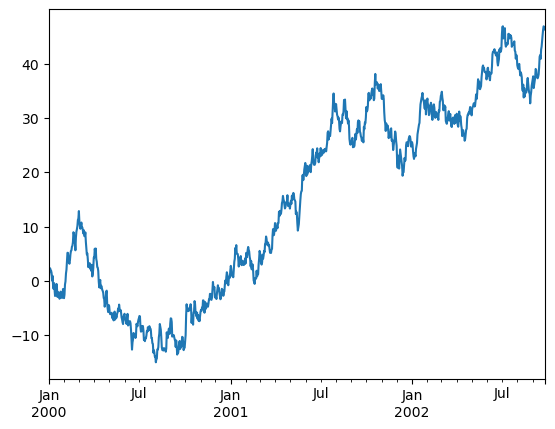

In [52]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

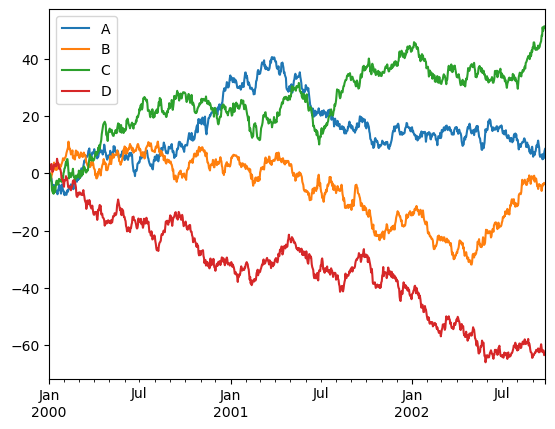

In [54]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')